**Dwali Sales Data Analysis:-**

 # Understanding the problem statement:-

# **Importing the libraries:-**

In [31]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

# **Importing the data set:-**

In [2]:
df=pd.read_csv("/content/Diwali Sales Data.csv", encoding='latin-1')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df_copy=df

# **Data cleaning:-**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# Deleting of unwanted columns:-
df.drop(columns=['User_ID','Cust_name','Product_ID','Status','unnamed1'],axis=1,inplace=True)

In [7]:
df.head()

,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [8]:
# Checking for null values:
df.isnull().sum()

,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0
Product_Category,0
Orders,0
Amount,12


In [9]:
print("Ammount of nulls:",(df.isnull().sum().sum()/df.shape[0])*100,'%')

Ammount of nulls: 0.10665718602790863 %


In [10]:
#Deleting of null valueS:-
df.dropna(inplace=True)

In [11]:
# checking of duplicate values:-
df.duplicated().sum()

np.int64(8)

In [12]:
# drop the duplicate values:
df.drop_duplicates(inplace=True)

In [13]:
# rechaking of duplicate values:
df.duplicated().sum()

np.int64(0)

In [14]:
# checking for outliers:
df.describe()

,Age,Marital_Status,Orders,Amount
count,11231.000000,11231.000000,11231.000000,11231.000000
mean,35.411985,0.419998,2.489093,9454.084982
std,12.756116,0.493580,1.114880,5221.728776
min,12.000000,0.000000,1.000000,188.000000
25%,27.000000,0.000000,2.000000,5443.000000
50%,33.000000,0.000000,2.000000,8109.000000
75%,43.000000,1.000000,3.000000,12677.500000
max,92.000000,1.000000,4.000000,23952.000000


<Axes: ylabel='Age'>

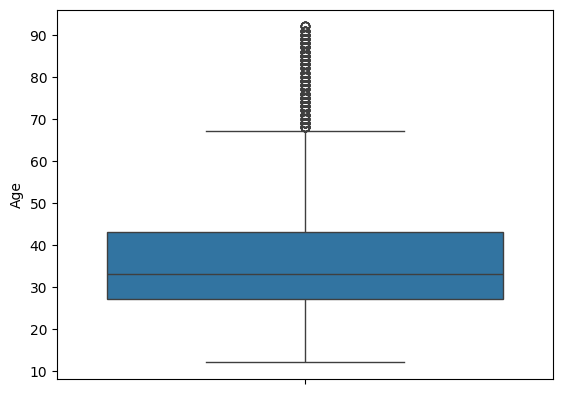

In [17]:
# represent the outliers:
sns.boxplot(df['Age'])

<Axes: ylabel='Amount'>

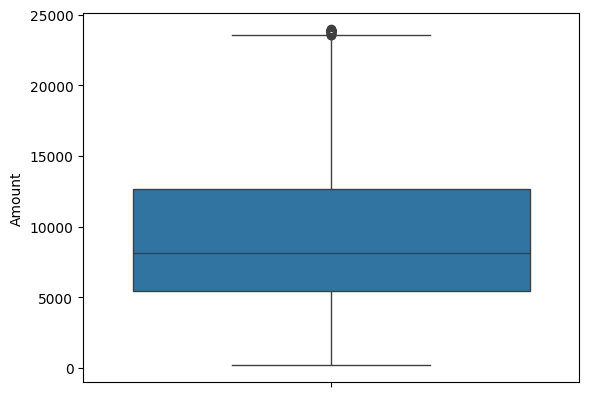

In [18]:
sns.boxplot(df['Amount'])

In [15]:
out_columns=['Age', 'Amount']

In [16]:
out_columns

['Age', 'Amount']

In [19]:
# removing of outliers
for i in out_columns:
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  iqr=q3-q1
  upper=q3+1.5*iqr
  lower=q1-1.5*iqr
  df=df[(df[i]>=lower) & (df[i]<=upper)]

In [20]:
df.describe()

,Age,Marital_Status,Orders,Amount
count,10928.000000,10928.000000,10928.000000,10928.000000
mean,34.267753,0.420663,2.488745,9425.286186
std,10.630316,0.493688,1.115406,5185.783113
min,12.000000,0.000000,1.000000,188.000000
25%,27.000000,0.000000,1.000000,5443.000000
50%,33.000000,0.000000,2.000000,8108.000000
75%,42.000000,1.000000,3.000000,12623.750000
max,67.000000,1.000000,4.000000,23462.000000


Now the data is cleaned.

#**EDA:-**

In [21]:
df.head()

,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
25,F,26-35,33,0,Andhra Pradesh,Southern,IT Sector,Auto,3,23462.0
26,F,36-45,40,0,Uttar Pradesh,Central,Banking,Auto,3,23456.0
27,F,18-25,25,1,Andhra Pradesh,Southern,Banking,Auto,4,23451.0
28,M,51-55,54,1,Andhra Pradesh,Southern,Govt,Hand & Power Tools,2,23434.0
29,F,36-45,39,1,Andhra Pradesh,Southern,Aviation,Auto,3,23389.0


In [22]:
# performing eda into marital status:
df['Marital_Status']=df['Marital_Status'].map({1:'married',0:'unmarried'})

In [23]:
df['Amount']=df['Amount'].astype(int)

# **Analysis:-**

# 1.Which people have spent more money:

In [25]:
people=df.groupby(['Gender'])['Amount'].sum().reset_index().sort_values(by='Amount')

In [26]:
people # calculating the total ammount spent by different gender.

,Gender,Amount
1,M,30556532
0,F,72442993


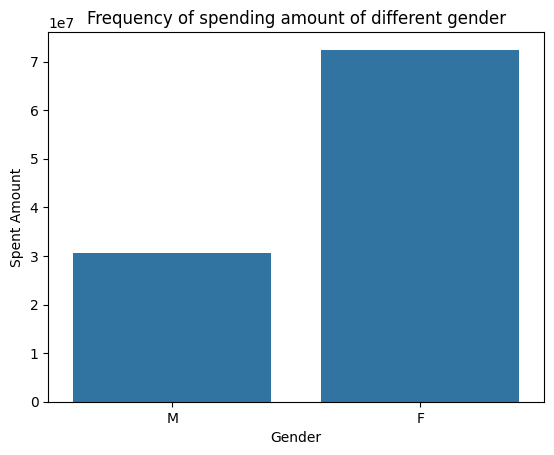

In [41]:
sns.barplot(x='Gender', y='Amount', data=people)
plt.title('Frequency of spending amount of different gender')
plt.xlabel('Gender')
plt.ylabel('Spent Amount')
plt.show()

Females are spending more money during Dewali shopping.

# 2.Which age group has done more shopping?


In [42]:
age_group=df.groupby(['Age Group'])['Orders'].count().reset_index().sort_values(by='Orders')
age_group

,Age Group,Orders
6,55+,144
0,0-17,295
5,51-55,827
4,46-50,982
1,18-25,1873
3,36-45,2282
2,26-35,4525


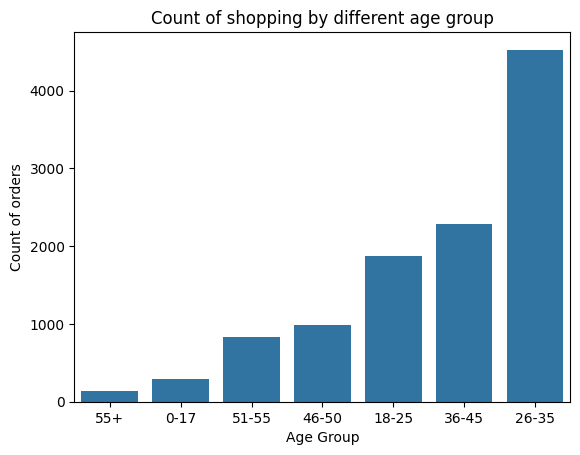

In [43]:
sns.barplot(x='Age Group', y='Orders', data=age_group)
plt.title('Count of shopping by different age group')
plt.xlabel('Age Group')
plt.ylabel('Count of orders')
plt.show()

Max shopping has been done by the age group 26-35

# 3.Which age group spent more money:

In [45]:
age_group_spent=df.groupby(['Age Group'])['Amount'].sum().reset_index().sort_values(by='Amount',ascending=False)
age_group_spent

,Age Group,Amount
2,26-35,42319970
3,36-45,22135135
1,18-25,17116997
4,46-50,9184319
5,51-55,8190826
0,0-17,2675741
6,55+,1376537


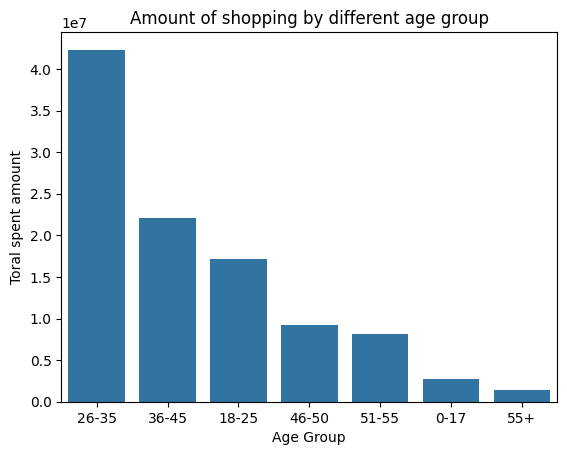

In [46]:
sns.barplot(x='Age Group', y='Amount', data=age_group_spent)
plt.title('Amount of shopping by different age group')
plt.xlabel('Age Group')
plt.ylabel('Toral spent amount')
plt.show()

As usual the age group between 26-35 spent more money on shopping.

# 4.Which state gave more orders:

In [47]:
df.head(2)

,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
25,F,26-35,33,unmarried,Andhra Pradesh,Southern,IT Sector,Auto,3,23462
26,F,36-45,40,unmarried,Uttar Pradesh,Central,Banking,Auto,3,23456


In [49]:
state=df.groupby(['State'])['Orders'].sum().reset_index().sort_values(by='Orders',ascending=False)
state

,State,Orders
14,Uttar Pradesh,4644
10,Maharashtra,3704
7,Karnataka,3180
2,Delhi,2690
9,Madhya Pradesh,2186
0,Andhra Pradesh,1975
5,Himachal Pradesh,1530
8,Kerala,1091
4,Haryana,1082
3,Gujarat,1031


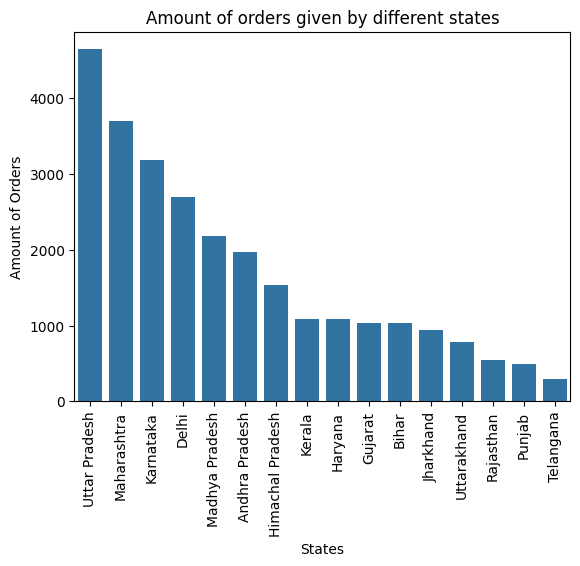

In [51]:
sns.barplot(x='State', y='Orders', data=state)
plt.title('Amount of orders given by different states')
plt.xlabel('States')
plt.ylabel('Amount of Orders')
plt.xticks(rotation=90)
plt.show()

In [52]:
#top 5 states are:
state['State'][:5]

,State
14,Uttar Pradesh
10,Maharashtra
7,Karnataka
2,Delhi
9,Madhya Pradesh


Above are the top five states gave more order.

# 5.Frequency of shopping based on marital status:

In [53]:
df.head(2)

,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
25,F,26-35,33,unmarried,Andhra Pradesh,Southern,IT Sector,Auto,3,23462
26,F,36-45,40,unmarried,Uttar Pradesh,Central,Banking,Auto,3,23456


In [54]:
marital_status=df.groupby(['Marital_Status'])['Orders'].count().reset_index()
marital_status

,Marital_Status,Orders
0,married,4597
1,unmarried,6331


Unmarried bachelors are doing more shopping.

# 6.Check which gender is providing more orders within unmarried bachelors:

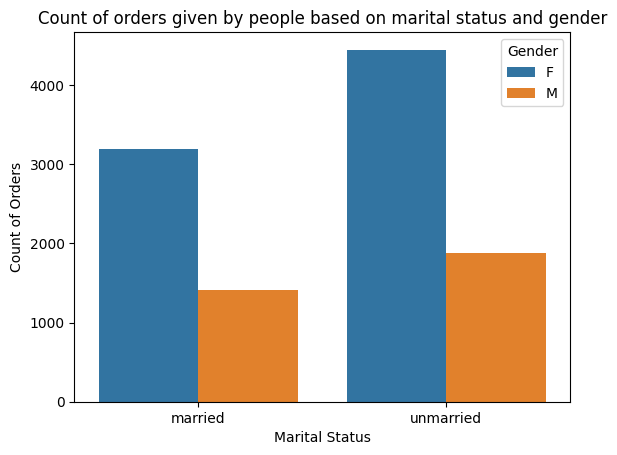

In [58]:
marital_gender = df.groupby(['Marital_Status', 'Gender'])['Orders'].count().reset_index()
sns.barplot(x='Marital_Status', y='Orders', data=marital_gender, hue='Gender')
plt.title('Count of orders given by people based on marital status and gender')
plt.xlabel('Marital Status')
plt.ylabel('Count of Orders')
plt.show()

Unmarried females are providing more orders.

# 7.From which sector most of the people are doing shopping?

In [59]:
df.head(2)

,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
25,F,26-35,33,unmarried,Andhra Pradesh,Southern,IT Sector,Auto,3,23462
26,F,36-45,40,unmarried,Uttar Pradesh,Central,Banking,Auto,3,23456


In [60]:
sector=df.groupby('Occupation')['Amount'].sum().reset_index().sort_values(by='Amount')
sector

,Occupation,Amount
0,Agriculture,2521425
14,Textile,3096328
5,Construction,3501201
6,Food Processing,3879851
13,Retail,4646162
11,Lawyer,4801835
4,Chemical,5183567
1,Automobile,5199193
12,Media,6058666
9,Hospitality,6196507


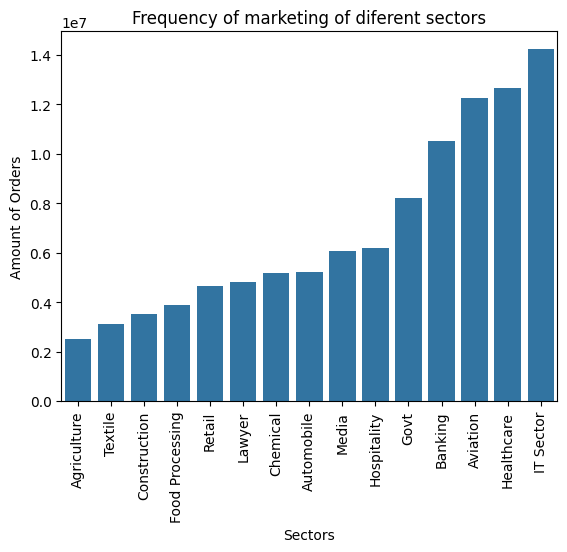

In [62]:
sns.barplot(x='Occupation', y='Amount', data=sector)
plt.title('Frequency of marketing of diferent sectors')
plt.xlabel('Sectors')
plt.ylabel('Amount of Orders')
plt.xticks(rotation=90)
plt.show()

Most of are from IT sector.

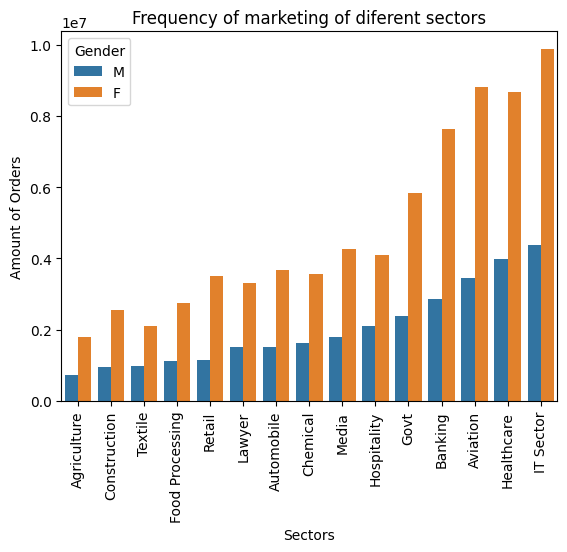

In [64]:
sector_gender=df.groupby(['Occupation','Gender'])['Amount'].sum().reset_index().sort_values(by='Amount')
sns.barplot(x='Occupation', y='Amount', data=sector_gender,hue='Gender')
plt.title('Frequency of marketing of diferent sectors')
plt.xlabel('Sectors')
plt.ylabel('Amount of Orders')
plt.xticks(rotation=90)
plt.show()

In every sector females are ahead of shopping.

# 8.What are the top selling products:-

In [65]:
df.head(2)

,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
25,F,26-35,33,unmarried,Andhra Pradesh,Southern,IT Sector,Auto,3,23462
26,F,36-45,40,unmarried,Uttar Pradesh,Central,Banking,Auto,3,23456


In [72]:
products=df.groupby('Product_Category')['Orders'].sum().reset_index().sort_values(by='Orders',ascending=False)[:5]
products

,Product_Category,Orders
3,Clothing & Apparel,6445
6,Food,5962
5,Electronics & Gadgets,5088
7,Footwear & Shoes,2552
11,Household items,1317


Clothing & Apparel were bought most.

# 9.Compare purchasing categories based on gender:-

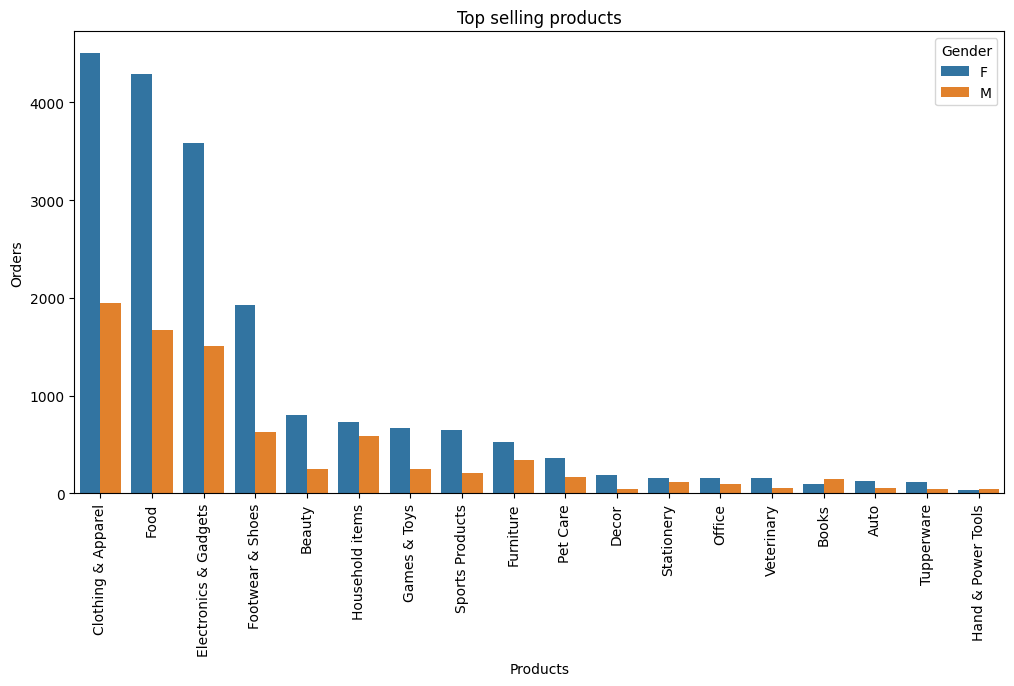

In [70]:
plt.figure(figsize=(12,6))
products_gender=df.groupby(['Product_Category','Gender'])['Orders'].sum().reset_index().sort_values(by='Orders',ascending=False)
sns.barplot(x='Product_Category', y='Orders', data=products_gender,hue='Gender')
plt.title('Top selling products')
plt.xlabel('Products')
plt.ylabel('Orders')
plt.xticks(rotation=90)
plt.show()

Except books in all other product buying  females are head and clothing and apparels were bought most.

# 10.What are the top 10 products based on expenses:

In [71]:
products=df.groupby('Product_Category')['Amount'].sum().reset_index().sort_values(by='Amount',ascending=False)[:10]
products

,Product_Category,Amount
6,Food,33148757
3,Clothing & Apparel,16096652
5,Electronics & Gadgets,15253623
7,Footwear & Shoes,15058299
8,Furniture,5264523
9,Games & Toys,4185300
14,Sports Products,3557205
1,Beauty,1899991
15,Stationery,1663175
11,Household items,1555515


# Mentioned are the top 10 products based on expenses.

In [ ]:
# Here are the ultimate business questions and insights.

# Business Questions and Insights from Diwali Sales Data Analysis:

1. **Which people have spent more money?**
   - **Insight:** Females are spending more money during Diwali shopping.

2. **Which age group has done more shopping?**
   - **Insight:** Maximum shopping has been done by the age group 26-35.

3. **Which age group spent more money?**
   - **Insight:** As usual the age group between 26-35 spent more money on shopping.

4. **Which state gave more orders?**
   - **Insight:** The top five states that gave more orders are Uttar Pradesh, Maharashtra, Karnataka, Delhi, and Madhya Pradesh.

5. **Frequency of shopping based on marital status:**
   - **Insight:** Unmarried people are doing more shopping.

6. **Check which gender is providing more orders within unmarried bachelors:**
   - **Insight:** Unmarried females are providing more orders.

7. **From which sector most of the people are doing shopping?**
   - **Insight:** Most shoppers are from the IT sector.

8. **What are the top selling products?**
   - **Insight:** Clothing & Apparel were bought most.

9. **Compare purchasing categories based on gender:**
   - **Insight:** Except for books, in all other product categories, females are leading in purchases, and clothing and apparels were bought most overall.

10. **What are the top 10 products based on expenses?**
    - **Insight:** The top 10 products based on expenses are Food, Clothing & Apparel, Electronics & Gadgets, Footwear & Shoes, Furniture, Games & Toys, Sports Products, Beauty, Stationery, and Household items.